In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
from sklearn import preprocessing
import librosa
from imblearn.combine import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import svm

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette, style='white')  # 解决Seaborn中文显示问题

In [131]:
df = pd.read_excel('../数据预处理/样本均衡后svm数据.xlsx')
df

,静态系数,一阶差分,二阶差分,人工地震
0,2.551643,2.162285,2.547006,0
1,2.376534,2.307241,2.281022,0
2,2.221158,2.214190,2.343021,0
3,2.266261,1.814186,2.209746,0
4,2.574899,2.155926,2.534411,0
...,...,...,...,...
210,2.158806,2.598665,2.328023,1
211,2.312019,2.609852,2.305600,1
212,2.387941,2.574900,2.310861,1
213,2.153037,2.600011,2.328591,1


In [132]:
X, y = df.iloc[:, :3], df['人工地震']
X

,静态系数,一阶差分,二阶差分
0,2.551643,2.162285,2.547006
1,2.376534,2.307241,2.281022
2,2.221158,2.214190,2.343021
3,2.266261,1.814186,2.209746
4,2.574899,2.155926,2.534411
...,...,...,...
210,2.158806,2.598665,2.328023
211,2.312019,2.609852,2.305600
212,2.387941,2.574900,2.310861
213,2.153037,2.600011,2.328591


In [133]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
print(X_train.shape, X_test.shape)

(150, 3) (65, 3)


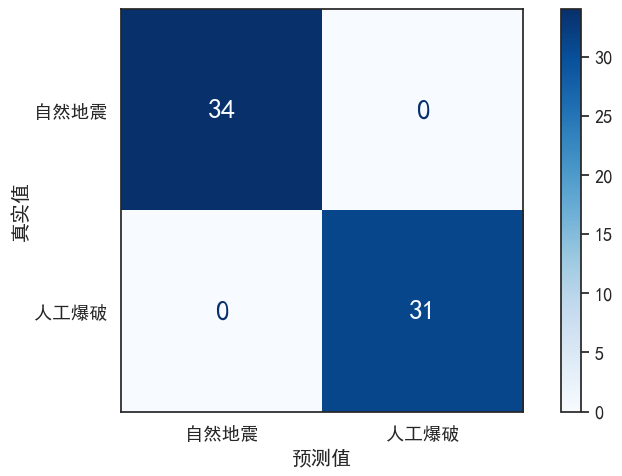

In [134]:
# 创建SVM分类器并进行训练
classifier = svm.SVC()
classifier.fit(X_train, y_train)

# 使用训练好的分类器进行预测
y_pred = classifier.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=['自然地震', '人工爆破'],
                                        text_kw={'size': 20}, ax=ax)
plt.ylabel('真实值')
plt.xlabel('预测值')
plt.tight_layout()
plt.savefig('SVM预测结果混淆矩阵.svg')
plt.show()